In [36]:
# imports
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt 

##### Questoin 1-a

Model:
$$
x^T = 
\begin{bmatrix}
x_1 & x_2
\end{bmatrix}
$$
$$
w = 
\begin{bmatrix}
5 \\ -2
\end{bmatrix}
$$
$$
\begin{bmatrix}
x_1 & x_2
\end{bmatrix}
\begin{bmatrix}
5 \\ -2
\end{bmatrix}
= 
5x_1 - 2x_2
$$

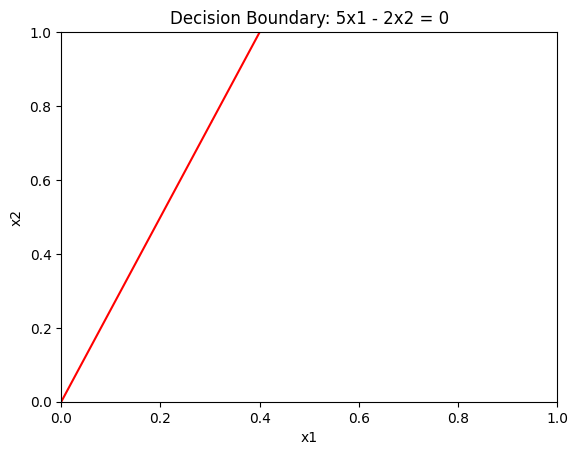

In [37]:
# Create grid of x1 and x2 values within the bounds of 0 to 1
x1_values = np.linspace(0, 1, 100)
x2_values = np.linspace(0, 1, 100)
X1, X2 = np.meshgrid(x1_values, x2_values)

# Calculate the decision boundary based on w = [5, -2]
decision_boundary = 5 * X1 - 2 * X2

# Plot the decision boundary where the value is zero
plt.contour(X1, X2, decision_boundary, levels=[0], colors='r')

# Set plot labels and title
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Decision Boundary: 5x1 - 2x2 = 0')

# Display the plot
plt.show()


This boundary represents a subspace of $R^2$  
it includes the origin is closed under addition and multiplication  

Orthonormal basis calculations:  
Vector of decision boundary
$$
v = 
\begin{bmatrix}
5 \\ 2
\end{bmatrix}
$$
$$ 
\| v \| = \sqrt{5^2 + 2^2} = \sqrt{29}
$$
For a vertor to be orthonormal the length must be 1 so:
$$
\text{Orthonormal basis} = 
\frac{1}{\sqrt{29}}
\begin{bmatrix}
5 \\ 2
\end{bmatrix}
$$

##### Question 1-b

Model:
$$
x^T = 
\begin{bmatrix}
x_1 & x_2 & 1
\end{bmatrix}
$$
$$
w = 
\begin{bmatrix}
5 \\ -2 \\ 1
\end{bmatrix}
$$
$$
\begin{bmatrix}
x_1 & x_2 & 1
\end{bmatrix}
\begin{bmatrix}
5 \\ -2 \\ 1
\end{bmatrix}
= 
5x_1 - 2x_2 +1
$$

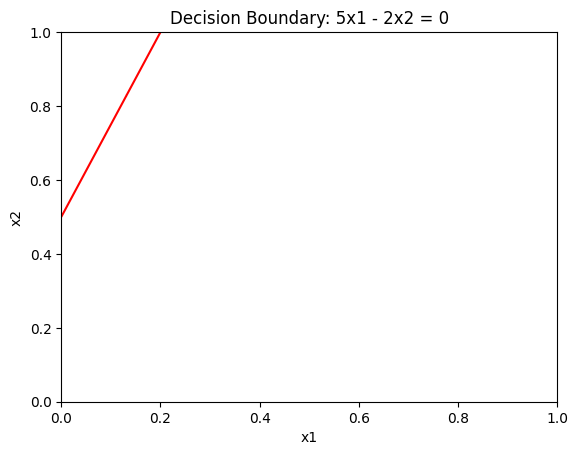

In [38]:
# Create grid of x1 and x2 values within the bounds of 0 to 1
x1_values = np.linspace(0, 1, 100)
x2_values = np.linspace(0, 1, 100)
X1, X2 = np.meshgrid(x1_values, x2_values)

# Calculate the decision boundary based on w = [5, -2]
decision_boundary = 5 * X1 - 2 * X2 + 1

# Plot the decision boundary where the value is zero
plt.contour(X1, X2, decision_boundary, levels=[0], colors='r')

# Set plot labels and title
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Decision Boundary: 5x1 - 2x2 = 0')

# Display the plot
plt.show()


This is not a subspace becasue it does not include the origin

##### Question 1-c

Model:
$$
x^T = 
\begin{bmatrix}
x_1^2 & x_2 & 1
\end{bmatrix}
$$
$$
w = 
\begin{bmatrix}
1 \\ -2 \\ 1
\end{bmatrix}
$$
$$
\begin{bmatrix}
x_1^2 & x_2 & 1
\end{bmatrix}
\begin{bmatrix}
1 \\ -2 \\ 1
\end{bmatrix}
= 
x_1^2 - 2x_2 + 1
$$

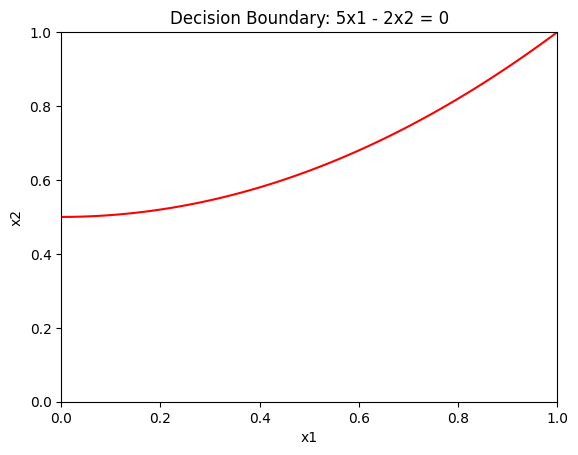

In [39]:
# Create grid of x1 and x2 values within the bounds of 0 to 1
x1_values = np.linspace(0, 1, 100)
x2_values = np.linspace(0, 1, 100)
X1, X2 = np.meshgrid(x1_values, x2_values)

# Calculate the decision boundary based on w = [5, -2]
decision_boundary = X1*X1 - 2 * X2 + 1

# Plot the decision boundary where the value is zero
plt.contour(X1, X2, decision_boundary, levels=[0], colors='r')

# Set plot labels and title
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Decision Boundary: 5x1 - 2x2 = 0')

# Display the plot
plt.show()


This is not a subspace becasue it does not include the origin and it is not closed under addition or multiplication

##### 2-a

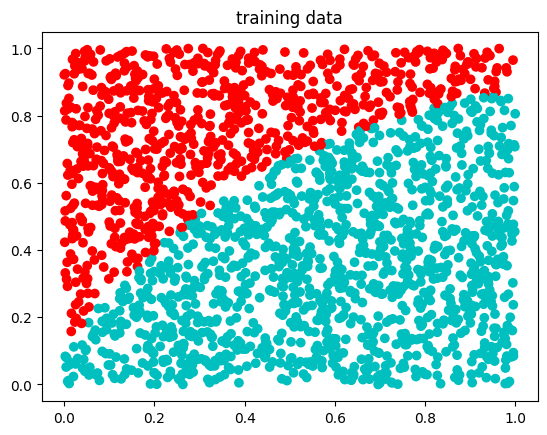

In [40]:
in_data = loadmat('classifier_data.mat')
#print([key for key in in_data]) # -- use this line to see the keys in the dictionary data structure 

x_train = in_data['x_train']
x_eval = in_data['x_eval']
y_train = in_data['y_train']
y_eval = in_data['y_eval']

n_eval = np.size(y_eval)
n_train = np.size(y_train)

plt.scatter(x_train[:,0],x_train[:,1], color=['c' if i==-1 else 'r' for i in y_train[:,0]])
plt.title('training data')
plt.show()


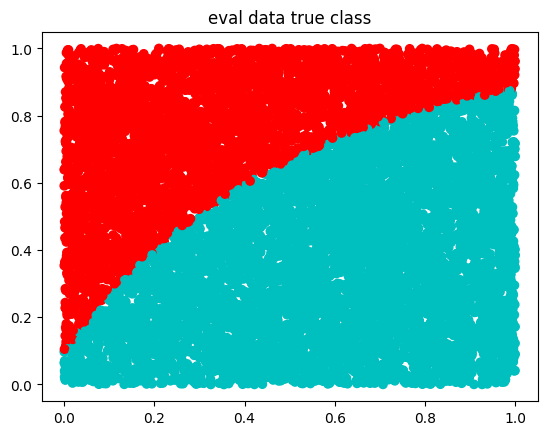

In [41]:
plt.scatter(x_eval[:,0],x_eval[:,1], color=['c' if i==-1 else 'r' for i in y_eval[:,0]])
plt.title('eval data true class')
plt.show()

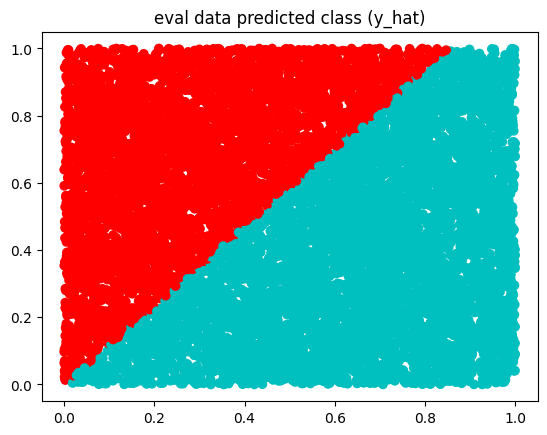

In [42]:
## Classifier 1 

# w = (X^T X)^(-1)X^T y
w_opt = np.linalg.inv(x_train.transpose()@x_train)@x_train.transpose()@y_train
y_hat = np.sign(x_eval@w_opt)

plt.scatter(x_eval[:,0],x_eval[:,1], color=['c' if i==-1 else 'r' for i in y_hat[:,0]])
plt.title('eval data predicted class (y_hat)')
plt.show()


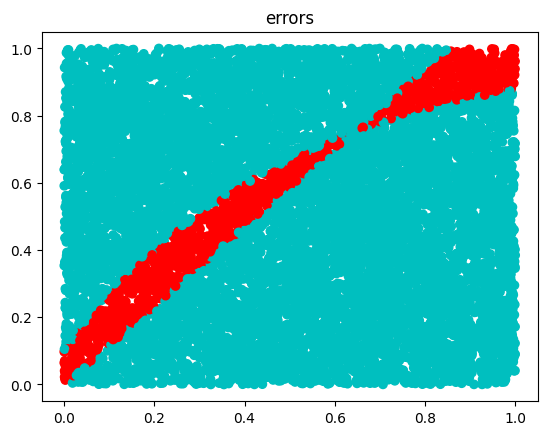

Errors: 1102
Total number of classifications: 10000


In [43]:
error_vec = [0 if i[0]==i[1] else 1 for i in np.hstack((y_hat, y_eval))]
plt.scatter(x_eval[:,0],x_eval[:,1], color=['c' if i==0 else 'r' for i in error_vec])
plt.title('errors')
plt.show()

print('Errors: '+ str(sum(error_vec)))
print('Total number of classifications: ' + str(len(y_eval)))

This generally fits the data but could improve. It appears there is a slight curve in the misclassificatons so a higher order line might be better  

$$
\text{Error \% } = \frac{1102}{10000} = 0.1102
$$

##### 2-b

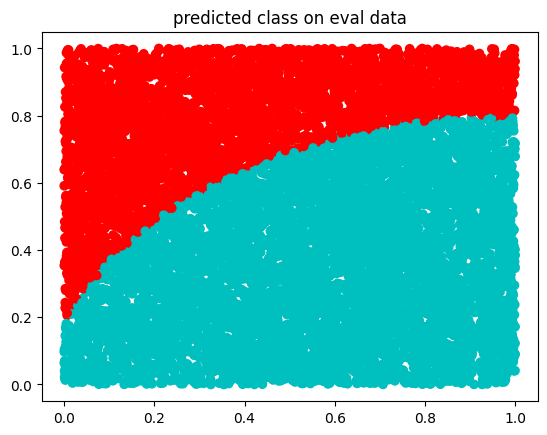

In [44]:
## Classifier 2
x_train_2 = np.hstack((x_train**2, x_train, np.ones((n_train,1)) ))
x_eval_2 = np.hstack((x_eval**2, x_eval, np.ones((n_eval,1)) ))

w_opt_2 = np.linalg.inv(x_train_2.transpose()@x_train_2)@x_train_2.transpose()@y_train
y_hat_2 = np.sign(x_eval_2@w_opt_2)

plt.scatter(x_eval[:,0],x_eval[:,1], color=['c' if i==-1 else 'r' for i in y_hat_2[:,0]])
plt.title('predicted class on eval data')
plt.show()

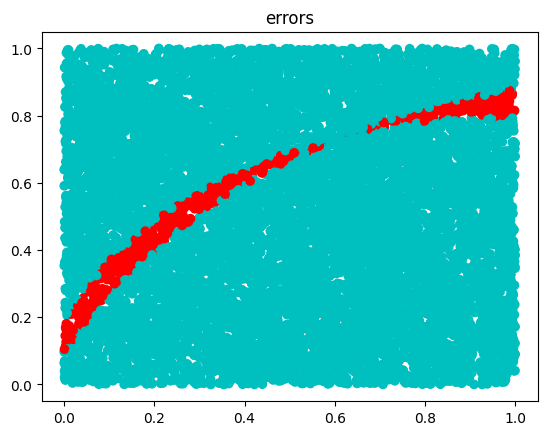

Error: 542


In [45]:
error_vec_2 = [0 if i[0]==i[1] else 1 for i in np.hstack((y_hat_2, y_eval))]
plt.scatter(x_eval[:,0],x_eval[:,1], color=['c' if i==0 else 'r' for i in error_vec_2])
plt.title('errors')
plt.show()

print('Error: '+ str(sum(error_vec_2)))

There is visibly less error with this classifier. It better fits the curved boundary of the real data  


$$
\text{Error \% } = \frac{542}{10000} = 0.0542
$$

##### 2-c

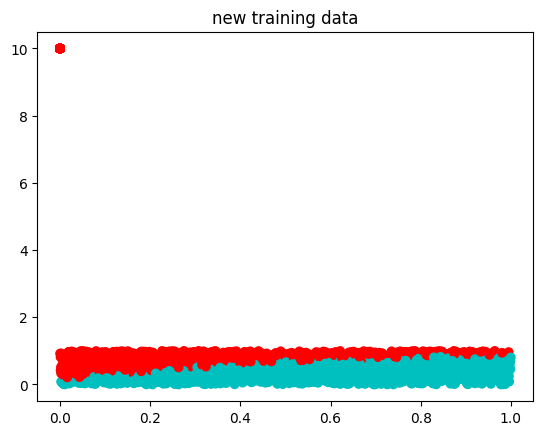

In [46]:
## create new, correctly labeled points 
n_new = 1000 #number of new datapoints
x_train_new = np.hstack((np.zeros((n_new,1)), 10*np.ones((n_new,1))))
y_train_new = np.ones((n_new,1))

## add these to the training data
x_train_outlier = np.vstack((x_train,x_train_new))
y_train_outlier = np.vstack((y_train,y_train_new))
plt.scatter(x_train_outlier[:,0],x_train_outlier[:,1], color=['c' if i==-1 else 'r' for i in y_train_outlier[:,0]])
plt.title('new training data')
plt.show()

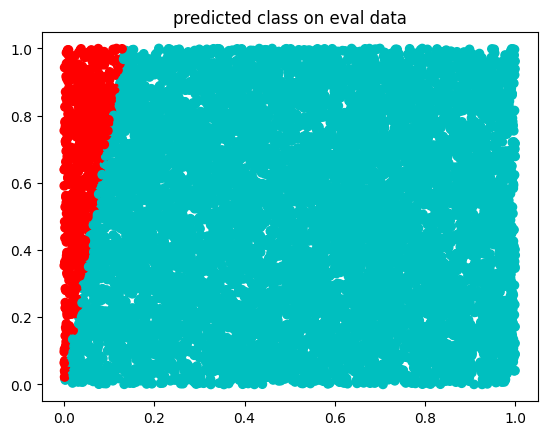

In [47]:
#train with new data
w_opt_outlier = np.linalg.inv(x_train_outlier.transpose()@x_train_outlier)@x_train_outlier.transpose()@y_train_outlier
y_hat_outlier = np.sign(x_eval@w_opt_outlier)

plt.scatter(x_eval[:,0],x_eval[:,1], color=['c' if i==-1 else 'r' for i in y_hat_outlier[:,0]])
plt.title('predicted class on eval data')
plt.show()

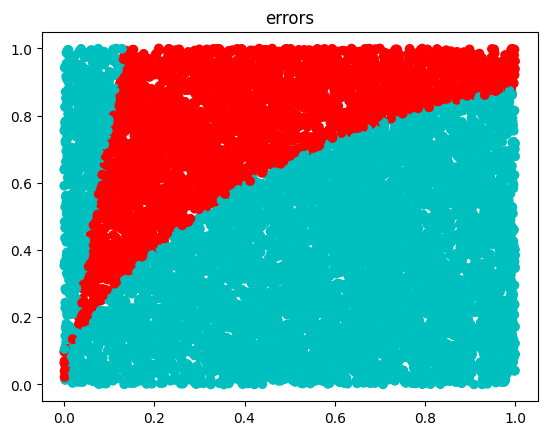

Errors: 3277


In [48]:
error_vec = [0 if i[0]==i[1] else 1 for i in np.hstack((y_hat_outlier, y_eval))]
plt.scatter(x_eval[:,0],x_eval[:,1], color=['c' if i==0 else 'r' for i in error_vec])
plt.title('errors')
plt.show()

print('Errors: '+ str(sum(error_vec)))

$$
\text{Error \% at (0,3)} = \frac{2134}{10000} = 0.2134
$$
$$
\text{Error \% at (0,10)} = \frac{3277}{10000} = 0.3277
$$

When we add this new data at (0,3), to minimize loss the model boundary adjusts to point upwards to decrease   
the distance between those added points and the decision boundary. When we move the points to (0, 10) the model  
take more drastic measures to lower the loss function. 

##### 3-a

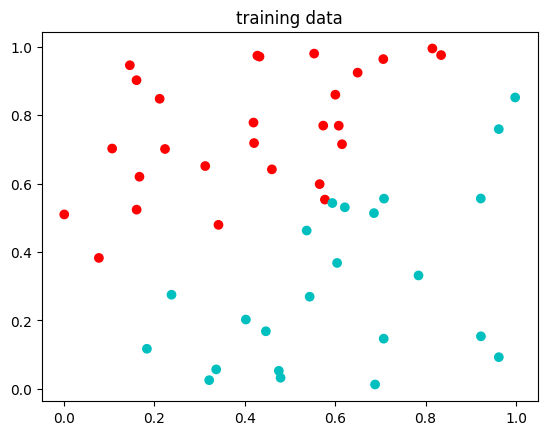

In [49]:
in_data = loadmat('overfitting_data.mat')
#print([key for key in in_data]) # -- use this line to see the keys in the dictionary data structure 

x_train = in_data['x_train']
x_eval = in_data['x_eval']
y_train = in_data['y_train']
y_eval = in_data['y_eval']

n_eval = np.size(y_eval)
n_train = np.size(y_train)

plt.scatter(x_train[:,0],x_train[:,1], color=['c' if i==-1 else 'r' for i in y_train[:,0]])
plt.title('training data')
plt.show()


##### 3-b

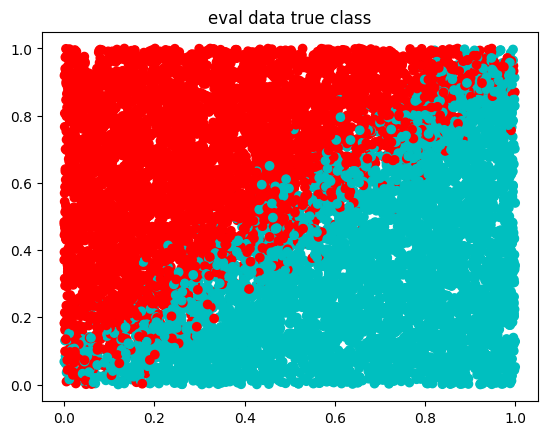

In [50]:
plt.scatter(x_eval[:,0],x_eval[:,1], color=['c' if i==-1 else 'r' for i in y_eval[:,0]])
plt.title('eval data true class')
plt.show()

##### 3-c

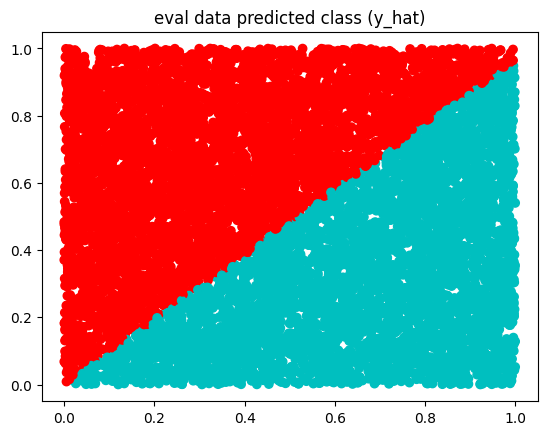

In [51]:
## Classifier 1 

# w = (X^T X)^(-1)X^T y
w_opt = np.linalg.inv(x_train.transpose()@x_train)@x_train.transpose()@y_train
y_hat = np.sign(x_eval@w_opt)

plt.scatter(x_eval[:,0],x_eval[:,1], color=['c' if i==-1 else 'r' for i in y_hat[:,0]])
plt.title('eval data predicted class (y_hat)')
plt.show()


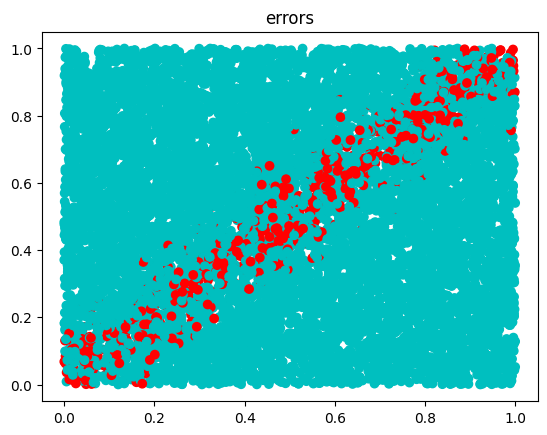

Errors: 759


In [52]:
error_vec = [0 if i[0]==i[1] else 1 for i in np.hstack((y_hat, y_eval))]
plt.scatter(x_eval[:,0],x_eval[:,1], color=['c' if i==0 else 'r' for i in error_vec])
plt.title('errors')
plt.show()

print('Errors: '+ str(sum(error_vec)))

##### 3-d

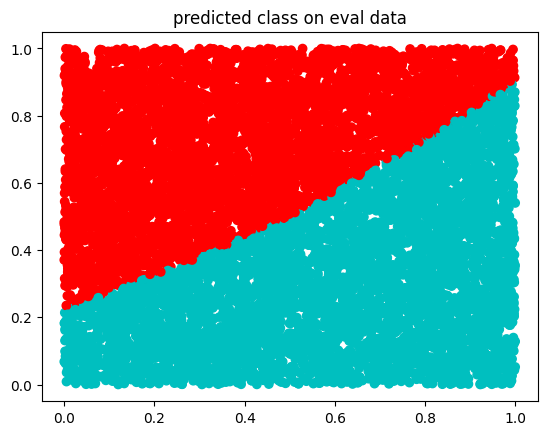

In [53]:
## Classifier 2
x_train_2 = np.hstack((x_train**2, x_train, np.ones((n_train,1)) ))
x_eval_2 = np.hstack((x_eval**2, x_eval, np.ones((n_eval,1)) ))

w_opt_2 = np.linalg.inv(x_train_2.transpose()@x_train_2)@x_train_2.transpose()@y_train
y_hat_2 = np.sign(x_eval_2@w_opt_2)

plt.scatter(x_eval[:,0],x_eval[:,1], color=['c' if i==-1 else 'r' for i in y_hat_2[:,0]])
plt.title('predicted class on eval data')
plt.show()

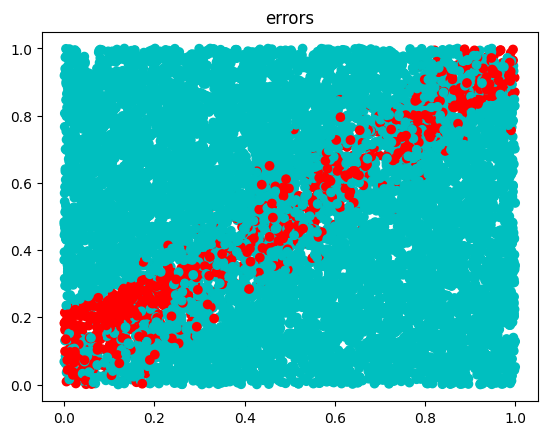

Error: 1066


In [54]:
error_vec_2 = [0 if i[0]==i[1] else 1 for i in np.hstack((y_hat_2, y_eval))]
plt.scatter(x_eval[:,0],x_eval[:,1], color=['c' if i==0 else 'r' for i in error_vec_2])
plt.title('errors')
plt.show()

print('Error: '+ str(sum(error_vec_2)))

##### 3-e

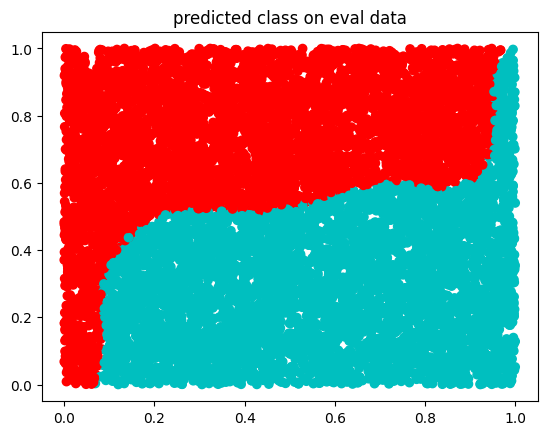

In [55]:
## Classifier 2
x_train_3 = np.hstack((x_train**6, x_train**5, x_train**4, x_train**3, x_train**2, x_train, np.ones((n_train,1)) ))
x_eval_3 = np.hstack((x_eval**6, x_eval**5, x_eval**4, x_eval**3, x_eval**2, x_eval, np.ones((n_eval,1)) ))

w_opt_3 = np.linalg.inv(x_train_3.transpose()@x_train_3)@x_train_3.transpose()@y_train
y_hat_3 = np.sign(x_eval_3@w_opt_3)

plt.scatter(x_eval[:,0],x_eval[:,1], color=['c' if i==-1 else 'r' for i in y_hat_3[:,0]])
plt.title('predicted class on eval data')
plt.show()

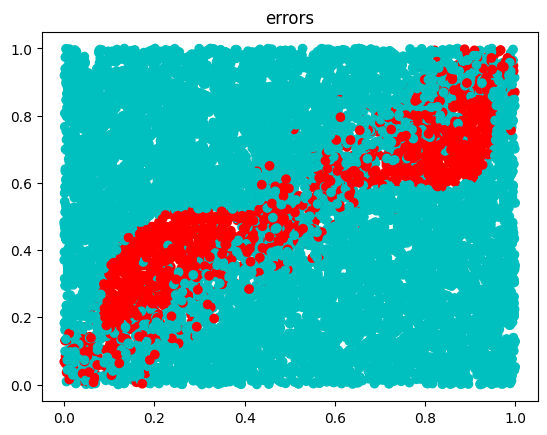

Error: 1677
Percent error: 16.77%


In [56]:
error_vec_3 = [0 if i[0]==i[1] else 1 for i in np.hstack((y_hat_3, y_eval))]
plt.scatter(x_eval[:,0],x_eval[:,1], color=['c' if i==0 else 'r' for i in error_vec_3])
plt.title('errors')
plt.show()
print('Error: '+ str(sum(error_vec_3)))
print('Percent error: ' + str(100.0*sum(error_vec_3)/len(error_vec_3) )+ '%')

##### Question 3-f

Classifier 3 preforms the worst because it has the highest error rate. It overfit the data

##### Question 4-a

The decision boundary is a plane

##### Question 5

$$
\begin{bmatrix}
x_1 & x_2 & x_3 & 1
\end{bmatrix}
\begin{bmatrix}
w_1 \\ w_2 \\ w_3 \\ w_4
\end{bmatrix}
=
x_1w_1 + x_2w_2 + x_3w_3 + w_4 = 0
$$

At the point $(0, 0, 1)$ the equation is:
$$
0w_1 + 0w_2 + 1w_3 + w_4 = 0
$$
$$
w_3 = -w_4
$$
$$
W = 
\begin{bmatrix}
0 \\ 0 \\ 1 \\ -1
\end{bmatrix}
$$

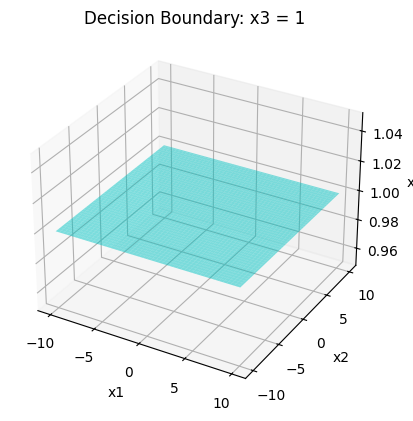

In [57]:
# Create a meshgrid for x1 and x2
x1_vals = np.linspace(-10, 10, 100)
x2_vals = np.linspace(-10, 10, 100)
x1, x2 = np.meshgrid(x1_vals, x2_vals)

# The decision boundary is at x3 = 1, so we set x3 to 1 across the grid
x3 = np.ones_like(x1)

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the decision boundary plane
ax.plot_surface(x1, x2, x3, color='cyan', alpha=0.5)

# Set labels
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')

# Title of the plot
ax.set_title('Decision Boundary: x3 = 1')

# Show the plot
plt.show()
